In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
data = load_iris()
x_raw = data['data']
y_raw = data['target']
idx2lbl = {k:v for k,v in enumerate(data['target_names'])}
x_raw.shape, y_raw.shape

((150, 4), (150,))

In [28]:
x = StandardScaler().fit_transform(x_raw)
pca = PCA()
x = pca.fit_transform(x)[:,:2]
y = y_raw.copy()
x.shape, y.shape

((150, 2), (150,))

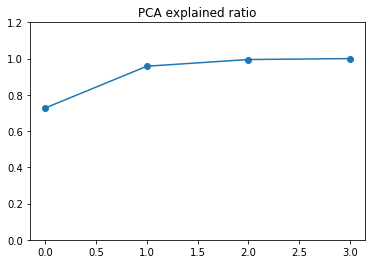

In [29]:
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o-')
plt.ylim(0,1.2)
plt.title('PCA explained ratio');

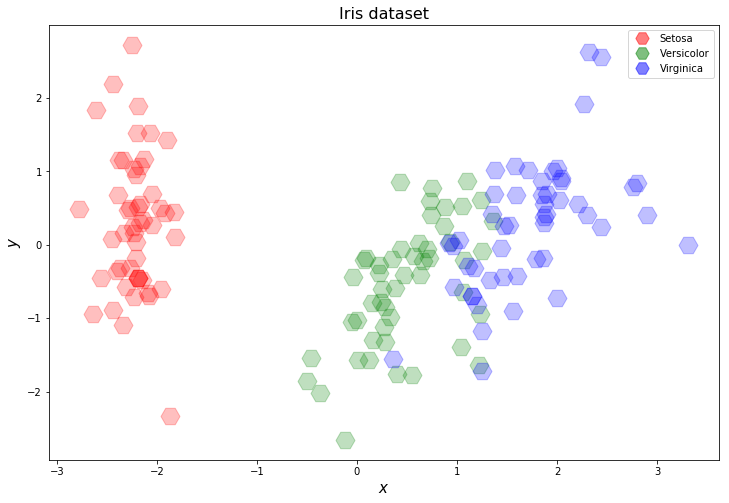

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

for i,c in enumerate(['red', 'green', 'blue']):
    idxs = np.where(y == i)[0]
    ax.plot(x[idxs,0], x[idxs,1], 'H', markersize=19, alpha=0.25, c=c, label=idx2lbl[i].title())

ax.set_title('Iris dataset', size=16)
ax.set_xlabel('$x$', size=15)
ax.set_ylabel('$y$', size=15)

leg = ax.legend(markerscale=0.7)
for e in leg.get_lines(): e._legmarker.set_alpha(0.5)

In [31]:
m = LogisticRegression()
m.fit(x, y)
m.score(x, y)

0.8666666666666667

In [32]:
m.coef_[:], m.intercept_

(array([[-2.64515469,  0.84870636],
        [ 0.36182052, -1.13526491],
        [ 2.50975491,  0.1359675 ]]),
 array([-1.63368182, -0.88904781, -2.53182892]))

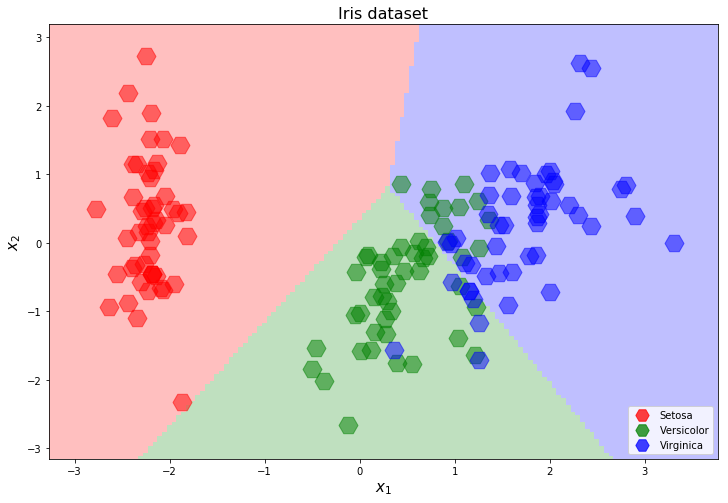

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

colors = [(1.0, 0.75, 0.75),
          (0.75, 0.88, 0.75),
          (0.75, 0.75, 1.0)]
colors = plt.cm.colors.ListedColormap(colors)

h = 0.05
x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
z = m.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, cmap=colors, edgecolors='none')

for i,c in enumerate(['red', 'green', 'blue']):
    idxs = np.where(y == i)[0]
    ax.plot(x[idxs,0], x[idxs,1], 'H', markersize=19, alpha=0.5, c=c, label=idx2lbl[i].title())

ax.set_title('Iris dataset', size=16)
ax.set_xlabel('$x_1$', size=15)
ax.set_ylabel('$x_2$', size=15)
leg = ax.legend(markerscale=0.7, loc='lower right')
for e in leg.get_lines(): e._legmarker.set_alpha(0.75)